In [1361]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [1362]:
#dataframe = pd.read_csv(r"TipoPalabra_conteos_mean_umbral_mean.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAs.csv")
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAspromedioMAX.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,sim verbos,cantidad,CLASS
0,8.401281,1.363580,1.149031,0.000000,2.325113,0.454527,0.259114,0.000000,3.174574,0.782569,...,0,0,0,0,2,3,0.800000,0.233037,25.631991,entailment
1,8.937979,3.000001,0.820234,0.000000,3.399397,1.000000,0.000000,0.000000,2.002434,0.505892,...,0,0,2,0,0,1,0.500000,0.203438,43.358374,entailment
2,4.330153,1.909053,1.799391,0.000000,2.551937,0.916135,0.689972,0.000000,0.501530,0.000000,...,0,0,0,0,0,0,0.400000,0.360803,13.512509,contradiction
3,0.028963,0.000000,2.676887,0.000000,0.031668,0.000000,0.636757,0.000000,0.119323,0.000000,...,0,0,2,0,0,1,1.000000,0.252164,2.416415,contradiction
4,3.277409,0.000000,2.061038,0.000000,1.638705,0.000000,1.030519,0.000000,0.000000,0.000000,...,0,0,2,0,0,0,0.000000,0.347747,23.910294,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.566009,1.451477,0.766031,1.412246,2.260360,1.476667,0.357769,0.739719,0.000000,0.000000,...,0,0,1,0,0,2,1.000000,0.236915,22.056425,entailment
96,0.415148,0.000000,0.439552,0.000000,0.415147,0.000000,0.439552,0.000000,0.000000,0.000000,...,0,0,1,0,0,1,1.000000,0.895790,2.617666,entailment
97,4.000000,0.000000,0.873123,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0,0,0,0,0,0,0.400000,0.245138,10.912521,contradiction
98,1.729706,0.000000,1.423062,0.000000,0.000000,0.000000,0.000000,0.000000,0.861428,0.000000,...,0,0,2,0,0,0,1.000000,1.000000,11.189399,contradiction


In [1363]:
#dataframe.corr()

In [1364]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,sim verbos,cantidad
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.761347,0.794955,1.719975,0.230639,1.928872,0.433916,0.771088,0.122621,1.231266,0.286138,...,0.110000,0.170000,0.040000,1.480000,0.030000,0.260000,0.370000,0.593222,0.476850,22.724198
std,3.285846,1.397995,1.375329,0.643803,2.488580,0.945647,1.106752,0.455211,1.596435,0.703187,...,0.510397,0.603943,0.281411,1.218378,0.171447,0.504925,0.705748,0.360166,0.317428,16.284707
min,0.028963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171850,2.416415
25%,2.052701,0.000000,0.730803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.400000,0.255728,11.284062
50%,4.231289,0.000000,1.390212,0.000000,1.432870,0.000000,0.416269,0.000000,0.719091,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.535714,0.312278,17.750911
75%,6.227800,1.385554,2.228058,0.000000,2.746455,0.453786,1.006907,0.000000,1.658040,0.085371,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.893845,28.201470
max,17.454696,6.874469,6.109281,4.202004,17.434322,6.334804,5.843788,3.218731,9.563269,4.052570,...,4.000000,4.000000,2.000000,6.000000,1.000000,2.000000,3.000000,1.000000,1.000000,89.999936


In [1365]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


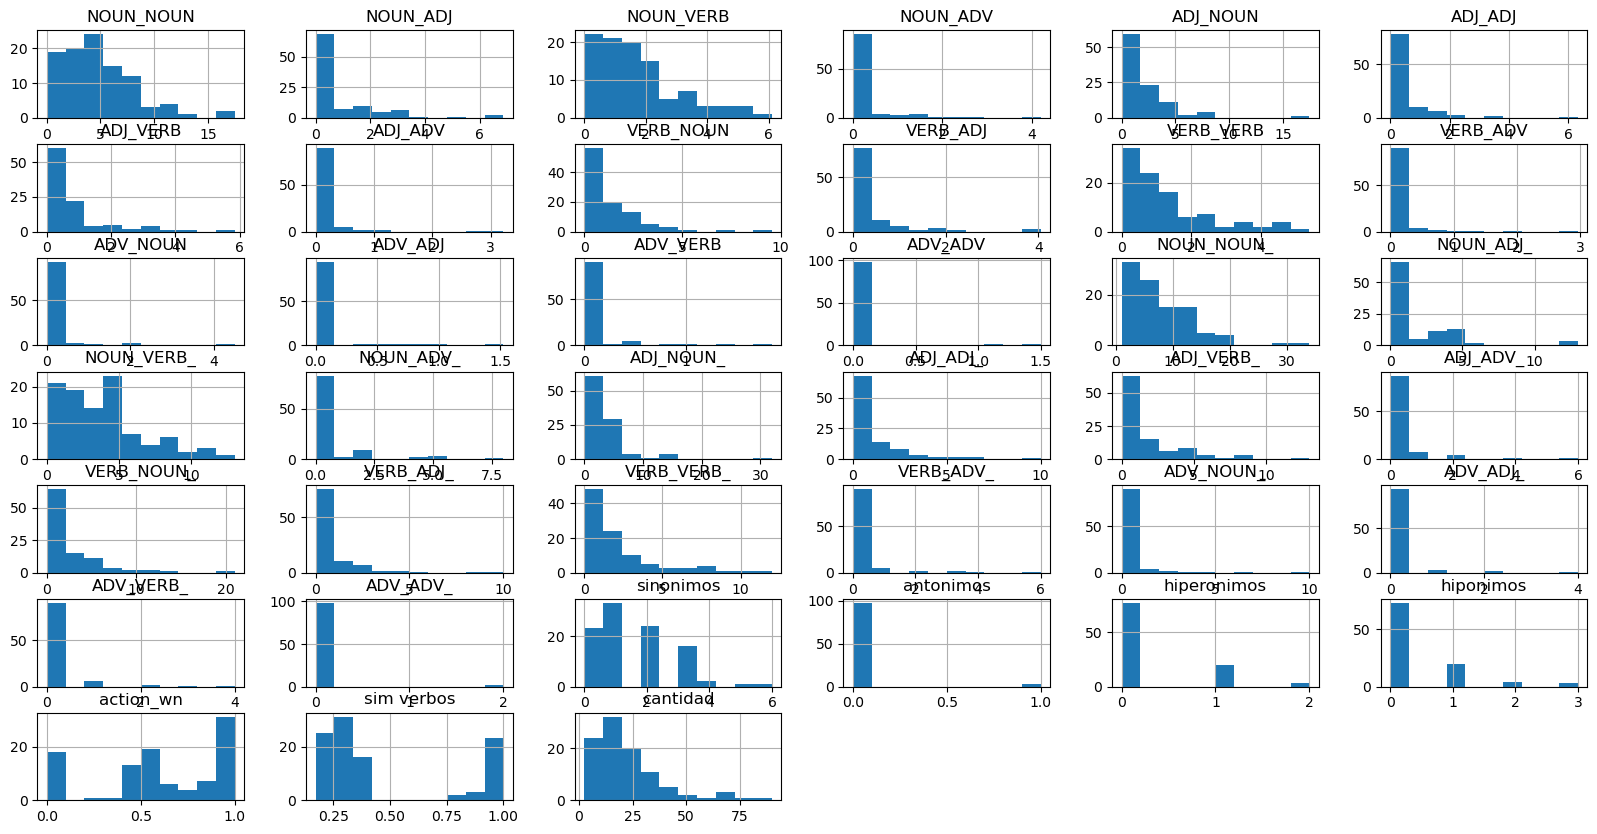

In [1366]:
dataframe.hist(figsize=(20,10))
plt.show()

In [1367]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [1368]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [1369]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_10236\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_10236\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 39)

In [1370]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [1371]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [1372]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [1373]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1374]:
model.decision_function(X)

array([[ 4.18230173e-01, -3.27838399e-01, -9.03917740e-02],
       [-2.21226403e-01,  6.61138681e-01, -4.39912278e-01],
       [-2.02894621e-01,  9.36876879e-04,  2.01957744e-01],
       [-1.59069962e-01,  3.97466206e-01, -2.38396244e-01],
       [-4.38140599e-01,  3.57346819e-01,  8.07937798e-02],
       [ 1.81576070e-01, -4.05369948e-02, -1.41039075e-01],
       [-8.02313272e-02,  1.16788429e-01, -3.65571013e-02],
       [-5.06749100e-01,  8.95795219e-01, -3.89046119e-01],
       [-1.50655033e-01, -6.42010233e-01,  7.92665266e-01],
       [ 5.13856916e-01,  1.64968319e+00, -2.16354010e+00],
       [-3.46696952e-01,  1.71440717e-01,  1.75256235e-01],
       [ 2.96548150e-01, -1.18449355e-01, -1.78098795e-01],
       [-2.62931935e-01,  6.36803604e-01, -3.73871668e-01],
       [ 2.57489490e-01,  8.23579177e-01, -1.08106867e+00],
       [-7.17332337e-01, -1.70825602e+00,  2.42558836e+00],
       [-3.59945577e-01,  4.49070998e-01, -8.91254208e-02],
       [-2.54724534e-01,  1.90115886e+00

In [1375]:
labels=dataframe.columns[1:]

In [1376]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [1377]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [1378]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  27 ADV_NOUN_ 32 antonimos
Entailment  32 antonimos 27 ADV_NOUN_
Neutral  21 ADJ_VERB_ 36 sim verbos


In [1379]:
n_columns=dataframe.shape[1]-1

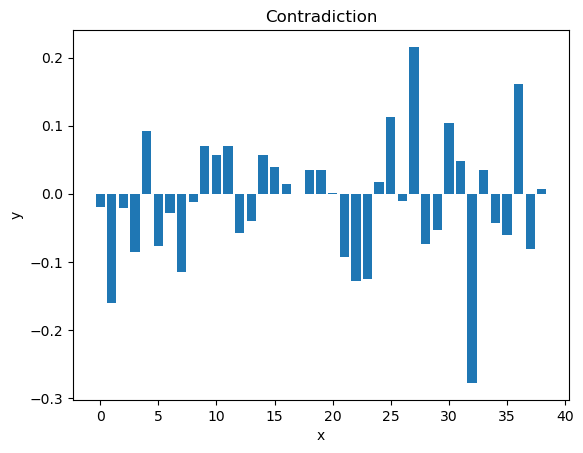

In [1380]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

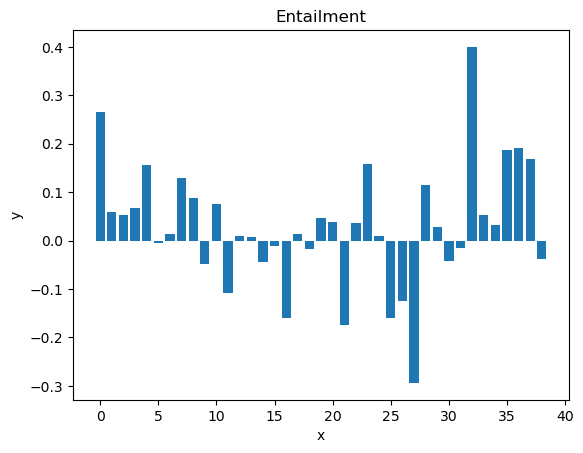

In [1381]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

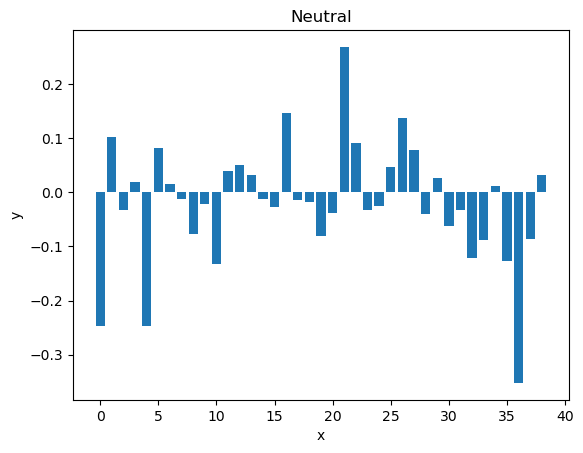

In [1382]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [1383]:
predictions = model.predict(X)
print(predictions)

['contradiction' 'entailment' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'neutral' 'entailment'
 'neutral' 'contradiction' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'contradiction' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'contradiction' 'entailment'
 'neutral' 'entailment' 'entailment' 'neutral' 'contradiction' 'neutral'
 'contradiction' 'contradiction' 'contradiction' 'contradiction' 'neutral'
 'entailment' 'neutral' 'neutral' 'entailment' 'neutral' 'neutral'
 'contradiction' 'entailment' 'entailment' 'contradiction' 'entailment'
 'entailment' 'neutral' 'neutral' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral' 'neutral'
 'neutral' 'neutral' 'entailment' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'entailment' 'contradiction' 'neutral' 'neutral'
 'entailment' 'entailment' 'entailment

In [1384]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [1385]:
X

array([[ 8.40128101,  1.36358026,  1.14903089, ...,  0.8       ,
         0.23303741, 25.6319913 ],
       [ 8.93797857,  3.0000006 ,  0.82023352, ...,  0.5       ,
         0.20343813, 43.3583741 ],
       [ 4.3301526 ,  1.90905339,  1.79939061, ...,  0.4       ,
         0.36080334, 13.51250924],
       ...,
       [ 4.00000048,  0.        ,  0.87312317, ...,  0.4       ,
         0.24513762, 10.9125206 ],
       [ 1.7297056 ,  0.        ,  1.42306229, ...,  1.        ,
         1.        , 11.18939924],
       [ 4.1998066 ,  0.        ,  0.76974306, ...,  0.66666667,
         0.23483758, 17.15262644]])

In [1386]:
model.score(X,y)

0.71

In [1387]:
print(confusion_matrix(y, predictions))

[[13 10  4]
 [ 5 36  1]
 [ 3  6 22]]


In [1388]:
print(f1_score(y,predictions, average=None))

[0.54166667 0.76595745 0.75862069]


In [1389]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [1390]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression: 0.375000 (0.230489)


c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [1391]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8


In [1392]:
print(confusion_matrix(Y_validation, predictions))

[[2 1 0]
 [1 9 0]
 [0 2 5]]


In [1393]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.67      0.67      0.67         3
   entailment       0.75      0.90      0.82        10
      neutral       1.00      0.71      0.83         7

     accuracy                           0.80        20
    macro avg       0.81      0.76      0.77        20
 weighted avg       0.82      0.80      0.80        20



In [1394]:
#X_new = pd.DataFrame()
#model.predict(X_new)